In [ ]:
# Script to show the identification of new markers of task performance and their use as features for classification

# Step 1 - Differenciation of tasks - individual and group level - cf matlab code - Demo_NA_EEG_BCI.m

# Step 2 - Use of NA as potential features for classification and comparison with other tools

In [8]:
# imports and definition of the paths of interest
import os.path as osp
import os

import seaborn as sns
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


root="/Users/marieconstance.corsi/Documents/GitHub/Fenicotteri-equilibristi/Database/0_BCI/Classification/"

path_csv_root = root + '/1_Dataset-csv/NETBCI_EEG_DK_Sess4'
if not osp.exists(path_csv_root):
    os.mkdir(path_csv_root)
path_data_root = root + '/3_Dataset-netbci-EEG-sess4-DK'
if not osp.exists(path_data_root):
    os.mkdir(path_data_root)
path_data_root_chan = root + '/3_Dataset-netbci-eeg-sess4-DK'

In [46]:
# precomputations made here: Demo_Classification_ATM_vs_CSP_SVM_EEG.py


In [42]:
#%% Load results for statistical analysis
opt_zthresh = [1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]
opt_val_duration = [2, 3, 4, 5, 6, 7, 8]
kk_components = 8
freqbands= {'paper': [3, 40]}
fmin=3
fmax=40
nbSplit=50
subjects=range(20)

res_opt = pd.DataFrame()
res_stats_opt = pd.DataFrame()
OptConfig_sc_ATM = np.empty((20, 4))
Diff_opt_cfg = np.empty((nbSplit, 20))
OptConfig_sc_ATM_std = np.empty((20, 4))
for subj in subjects:
    res = pd.DataFrame()
    res_stats = pd.DataFrame()
    res_diff = pd.DataFrame()
    res_score=[]
    kk=0
    cfg=np.empty((len(opt_zthresh)*len(opt_val_duration),2))

    for i_zth, kk_zthresh in enumerate(opt_zthresh):
        for i_val, kk_val_duration in enumerate(opt_val_duration):
            #print(str(subj))
            temp_res = pd.read_csv(
                path_csv_root + "/SVM/IndivOpt_Comparison_SVM_ClassificationRebuttal-allnode-2class-right_hand-rest-subject-" + str(
                    subj) + "n_csp_cmp-" + str(kk_components) + "zthresh-" + str(kk_zthresh) +
                "-freq-" + str(fmin) + '-' + str(fmax) + '-nbSplit' + str(nbSplit) +
                "_val_duration_" + str(kk_val_duration) + "_EEG.csv")

            res=pd.concat((res,temp_res))

            temp_stat = pd.read_csv(
                path_csv_root + "/SVM/Exhaustive_StatsComparison_SVM_ClassificationRebuttal-allnode-2class-right_hand-rest-" + "n_csp_cmp-" + str(
                    kk_components) + "zthresh-" + str(kk_zthresh) +
                "-freq-" + str(fmin) + '-' + str(fmax) + '-nbSplit' + str(nbSplit) +
                "_val_duration_" + str(kk_val_duration) + "_EEG.csv") # 1 file for all subjects here

            res_stats=pd.concat((res_stats,temp_stat.iloc[[subj]]))

            temp_diff = pd.read_csv(
                path_csv_root + "/SVM/Exhaustive_DiffComparison_SVM_ClassificationRebuttal-allnode-2class-right_hand-rest-" +  "n_csp_cmp-" + str(kk_components) + "zthresh-" + str(kk_zthresh) +
                "-freq-" + str(fmin) +'-'+ str(fmax) +'-nbSplit' + str(nbSplit) +
                "_val_duration_" +str(kk_val_duration) + "_EEG.csv") # 1 file for all subjects here

            temp2=temp_diff[str(subj)]
            res_diff= pd.concat((res_diff,temp2))

            # scores
            temp_scores=pd.read_csv(
                path_csv_root + "/SVM/IndivOpt_Comparison_SVM_ClassificationRebuttal-allnode-2class-right_hand-rest-subject-" + str(
                    subj) + "n_csp_cmp-" + str(kk_components) + "zthresh-" + str(kk_zthresh) +
                "-freq-" + str(fmin) + '-' + str(fmax) + '-nbSplit' + str(nbSplit) +
                "_val_duration_" + str(kk_val_duration) + "_EEG.csv"
            )
            sc_ATM=temp_scores[temp_scores["pipeline"]=="ATM+SVM"]
            res_score=np.concatenate((res_score,[sc_ATM["score"].mean()]))#mean()]))

            cfg[kk, :] = np.array([kk_zthresh, kk_val_duration])
            kk = kk + 1

    cfg_opt = np.where(res_score == max(res_score))

    optimal_zthresh = cfg[cfg_opt[0][0], 0]
    if optimal_zthresh==2.0:
        optimal_zthresh=2
    elif optimal_zthresh==3.0:
        optimal_zthresh=3
    optimal_val_duration = cfg[cfg_opt[0][0], 1]
    if optimal_val_duration==2.0:
        optimal_val_duration=2
    elif optimal_val_duration==3.0:
        optimal_val_duration=3
    elif optimal_val_duration == 4.0:
        optimal_val_duration = 4
    elif optimal_val_duration == 5.0:
        optimal_val_duration = 5
    elif optimal_val_duration == 6.0:
        optimal_val_duration = 6
    elif optimal_val_duration == 7.0:
        optimal_val_duration = 7
    elif optimal_val_duration == 8.0:
        optimal_val_duration = 8
    #print("Optimal config - zthresh:  " + str(optimal_zthresh) + "& val_duration:" +
    #      str(optimal_val_duration))

    temp_res_opt = pd.read_csv(
        path_csv_root + "/SVM/IndivOpt_Comparison_SVM_ClassificationRebuttal-allnode-2class-right_hand-rest-subject-" + str(
            subj) + "n_csp_cmp-" + str(kk_components) + "zthresh-" + str(optimal_zthresh) +
        "-freq-" + str(fmin) + '-' + str(fmax) + '-nbSplit' + str(nbSplit) +
        "_val_duration_" + str(int(optimal_val_duration)) + "_EEG.csv"
    )
    res_opt = pd.concat((res_opt, temp_res_opt))

    sc_pipeline = temp_res_opt.loc[temp_res_opt['pipeline'] == 'ATM+SVM', 'score']
    Baseline = temp_res_opt.loc[temp_res_opt['pipeline'] == 'CSP+SVM', 'score']

    temp_Diff_opt_cfg = Baseline.values - sc_pipeline.values
    Diff_opt_cfg[:,subj]=temp_Diff_opt_cfg

    # statistical comparison previously made
    temp_stat_opt = pd.read_csv(
        path_csv_root + "/SVM/Exhaustive_StatsComparison_SVM_ClassificationRebuttal-allnode-2class-right_hand-rest-" + "n_csp_cmp-" + str(
            kk_components) + "zthresh-" + str(optimal_zthresh) +
        "-freq-" + str(fmin) + '-' + str(fmax) + '-nbSplit' + str(nbSplit) +
        "_val_duration_" + str(optimal_val_duration) + "_EEG.csv")  # 1 file for all subjects here

    res_stats_opt = pd.concat((res_stats_opt, temp_stat_opt.iloc[[subj]]))


    OptConfig_sc_ATM[subj,:] = [optimal_zthresh, optimal_val_duration, Baseline.values.mean(),sc_pipeline.values.mean()]
    OptConfig_sc_ATM_std[subj, :] = [optimal_zthresh, optimal_val_duration, Baseline.values.std(),
                                 sc_pipeline.values.std()]

df_optcfg=pd.DataFrame(OptConfig_sc_ATM, columns=["zthresh", "val_duration", "CSP+SVM", "ATM+SVM"])
df_optcfg_std=pd.DataFrame(OptConfig_sc_ATM_std, columns=["zthresh", "val_duration", "CSP+SVM", "ATM+SVM"])


In [44]:
# performances obtained in the best configuration for each subject
df_optcfg

,zthresh,val_duration,CSP+SVM,ATM+SVM
0,1.8,4.0,0.771613,0.841935
1,2.0,7.0,0.578947,0.768947
2,1.8,2.0,0.930769,0.885128
3,2.2,2.0,0.943158,0.857368
4,1.6,3.0,0.775897,0.650769
5,1.6,2.0,0.852222,0.865000
6,1.6,5.0,0.753333,0.832821
7,1.6,3.0,0.636364,0.765455
8,2.4,3.0,0.514857,0.709143
9,1.8,3.0,0.721622,0.750270


In [45]:
# std of the performances obtained at the individual level
df_optcfg_std

,zthresh,val_duration,CSP+SVM,ATM+SVM
0,1.8,4.0,0.054301,0.064918
1,2.0,7.0,0.069226,0.065376
2,1.8,2.0,0.040461,0.044186
3,2.2,2.0,0.044148,0.051860
4,1.6,3.0,0.062558,0.069352
5,1.6,2.0,0.067914,0.046484
6,1.6,5.0,0.064029,0.051087
7,1.6,3.0,0.075939,0.089854
8,2.4,3.0,0.082312,0.070610
9,1.8,3.0,0.076301,0.066105


## plot results

/opt/anaconda3/envs/M2-MVA_MEEG_hands-on/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


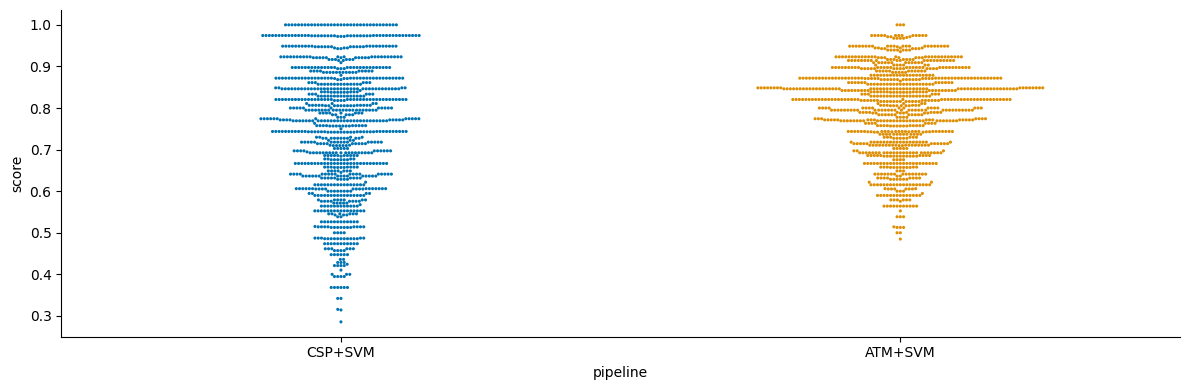

In [24]:
#%% plot - group-level
plt.style.use("default")
g = sns.catplot(y="score",
                x='pipeline',
                hue="pipeline",
                kind='swarm',
                height=4, aspect=3,s=5,
                palette="colorblind",
                data=res_opt)


/opt/anaconda3/envs/M2-MVA_MEEG_hands-on/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


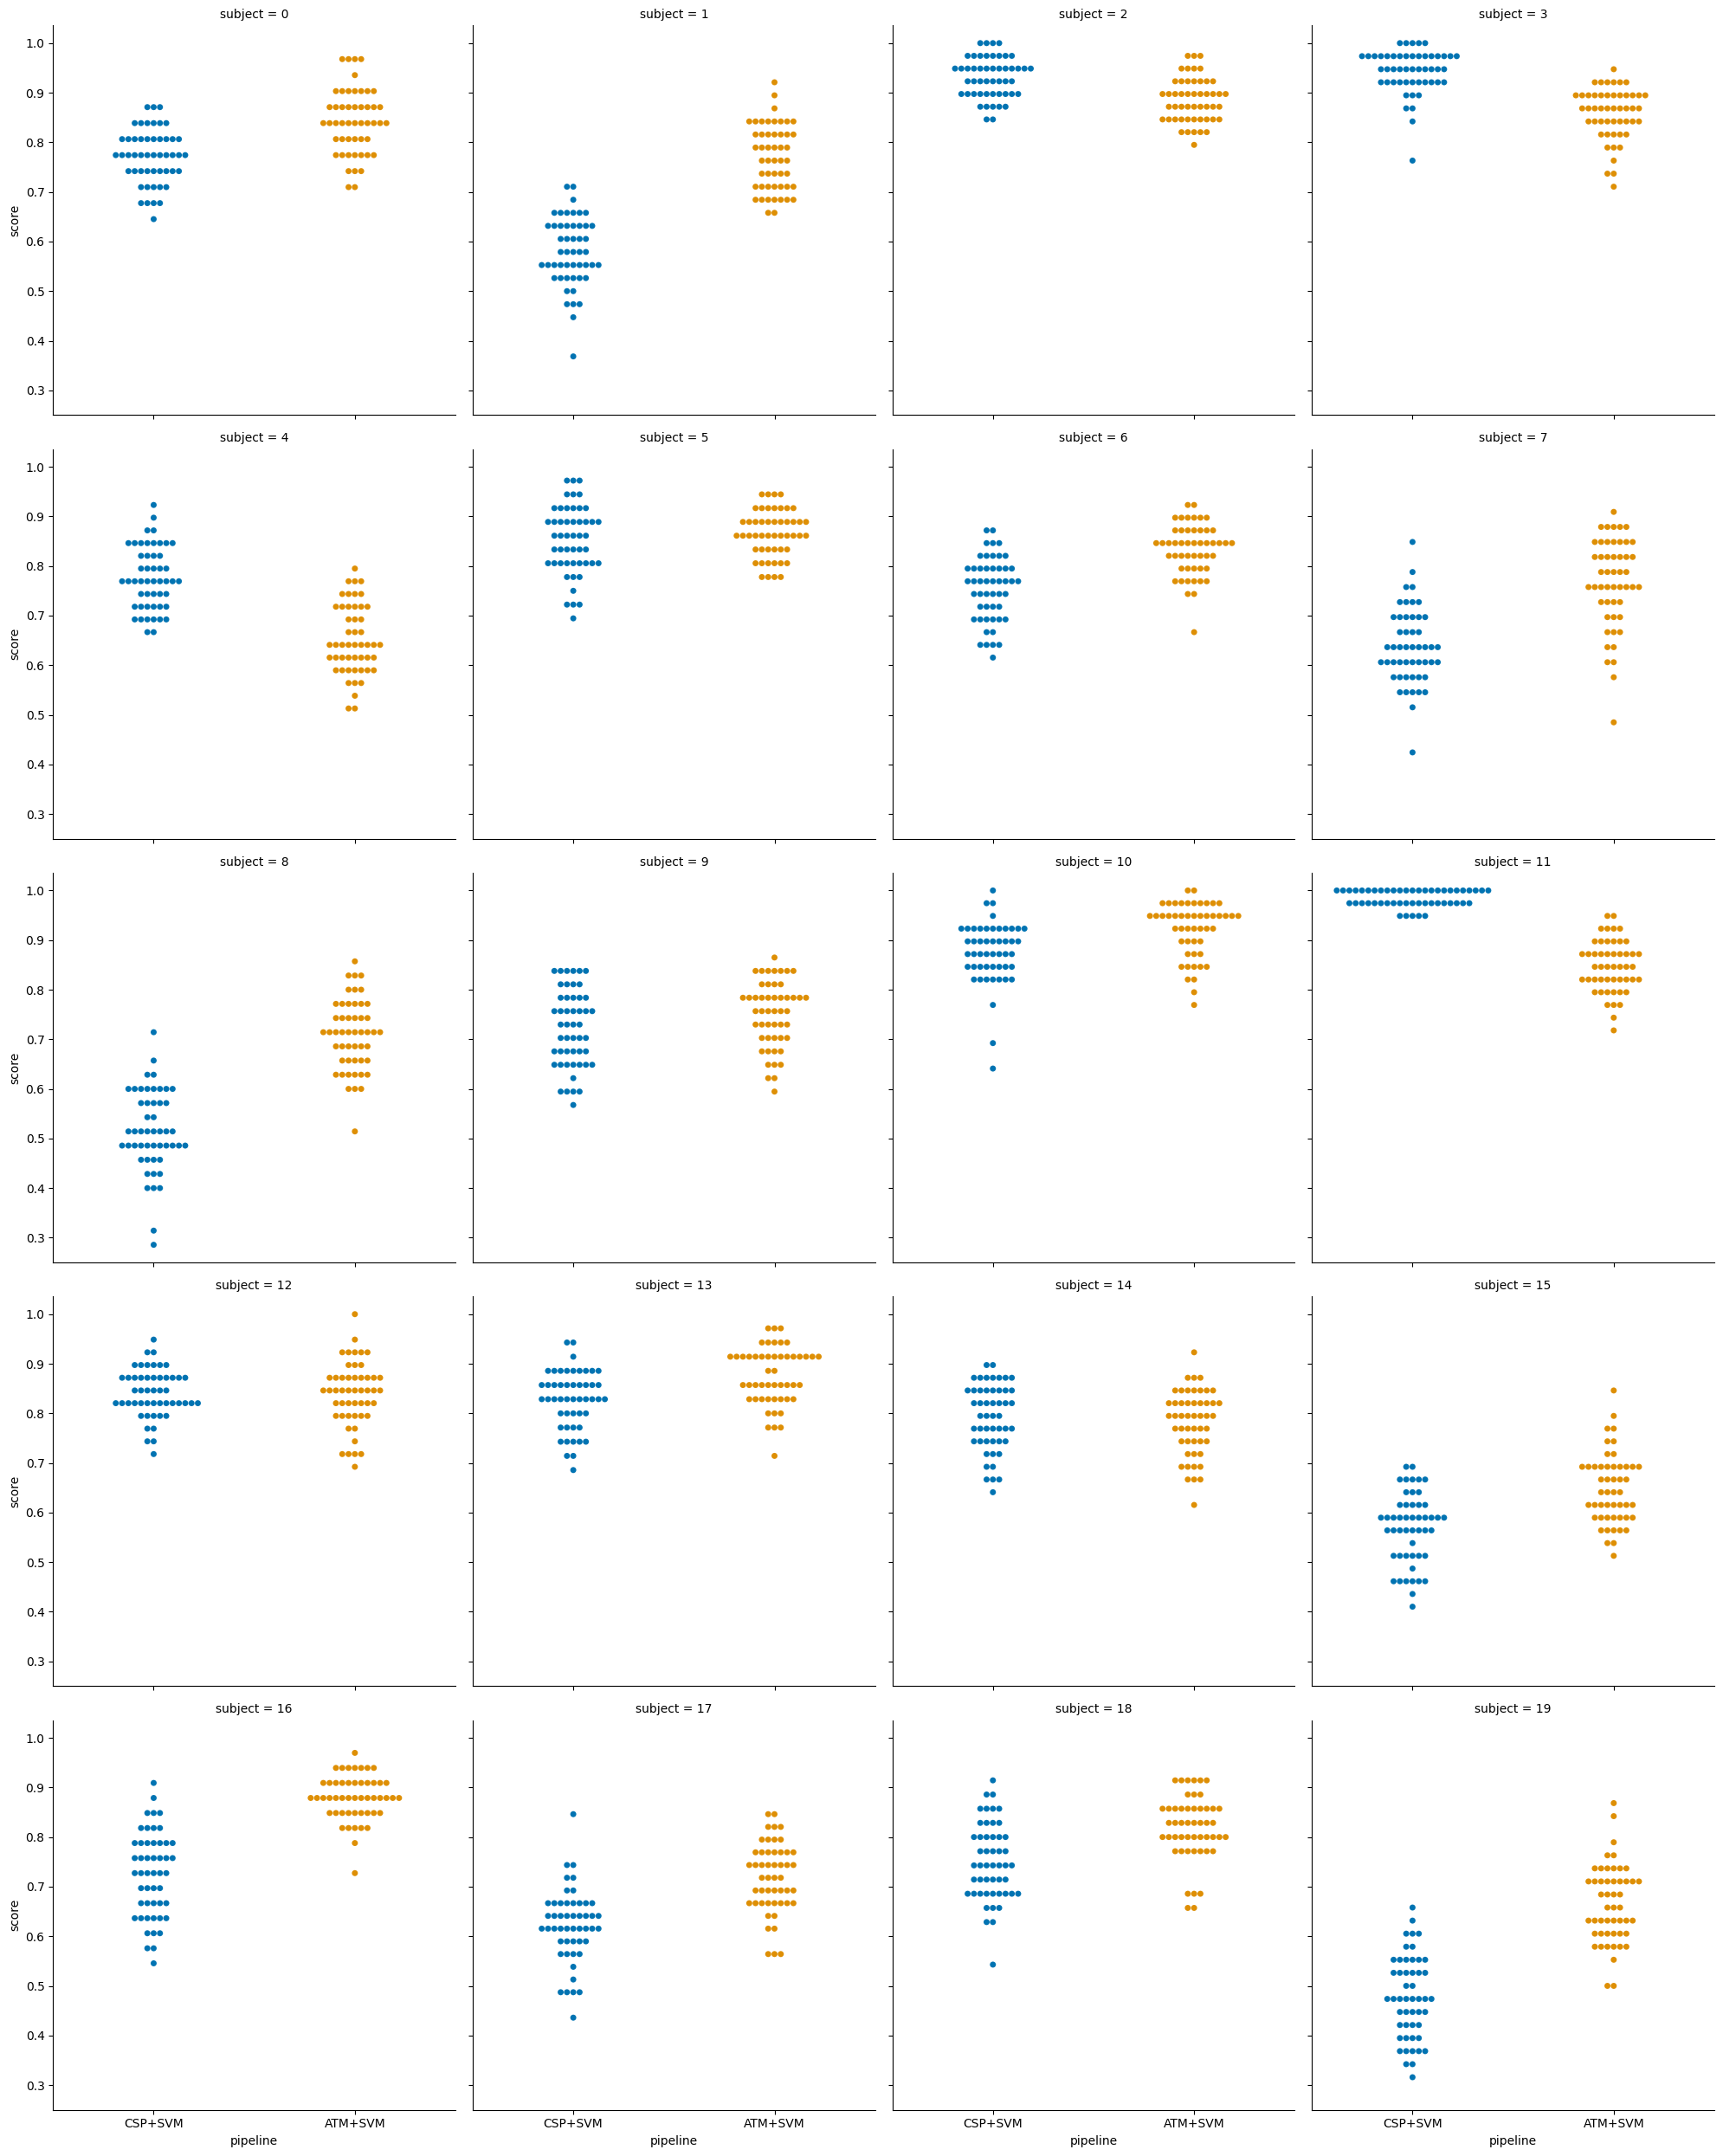

In [25]:
#%% plot - subject-level
plt.style.use("default")
g = sns.catplot(y="score",
                x='pipeline',
                col="subject",
                col_wrap=4,
                hue="pipeline",
                kind='swarm',
                #height=7, aspect=3,s=5,
                palette="colorblind",
                data=res_opt)

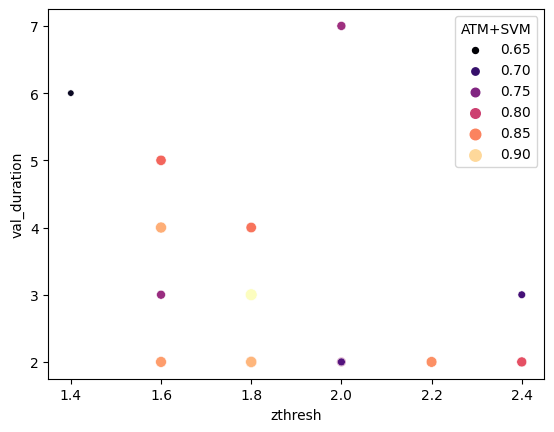

In [26]:
# plot chosen configurations
sns.scatterplot(data=df_optcfg, x="zthresh", y="val_duration", hue="ATM+SVM", size="ATM+SVM", palette="magma", legend="brief")

test_sc_pipeline = df_optcfg['ATM+SVM']
test_Baseline = df_optcfg['CSP+SVM']
test_Diff= test_Baseline - test_sc_pipeline

pd_Diff=pd.DataFrame()
pd_ATM=pd.DataFrame()
pd_CSP=pd.DataFrame()

pd_Diff=pd.DataFrame(test_Diff)
pd_Diff["pipeline"]=["Diff"]*len(pd_Diff)
pd_Diff.columns=["Avgscore", "pipeline"]

pd_ATM=pd.DataFrame(test_sc_pipeline)
pd_ATM["pipeline"]=["ATM+SVM"]*len(pd_ATM)
pd_ATM.columns=["Avgscore", "pipeline"]

pd_CSP=pd.DataFrame(test_Baseline)
pd_CSP["pipeline"]=["CSP+SVM"]*len(pd_CSP)
pd_CSP.columns=["Avgscore", "pipeline"]

pd_plot=pd.concat((pd_CSP,pd_ATM,pd_Diff))


In [28]:
# swarm diff
pd_plot_Diff = pd_plot[pd_plot["pipeline"]=="Diff"]
# swarm avg scores x pipelines
list_ppl=["ATM+SVM","CSP+SVM"]
pd_plot_avgsc= pd_plot[pd_plot["pipeline"].isin(list_ppl)]


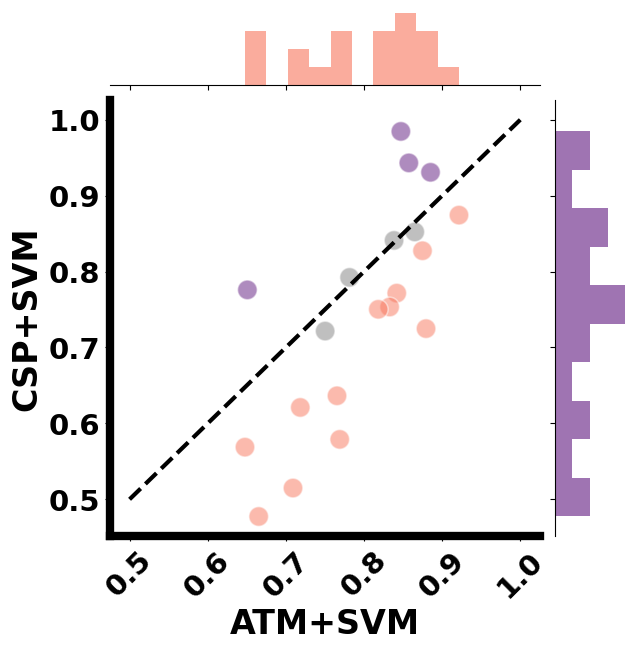

In [37]:
#%% paired plot - CSP+SVM vs ATM+SVM - best configurations - individual statistical results
plt.style.use('default')
test=pd.DataFrame(list(np.concatenate((subjects,subjects))), columns=["subject"])
pd_plot_avgsc_concat= pd.concat([pd_plot_avgsc.reset_index(drop=True), test.reset_index(drop=True)],axis=1)

signif=dict()
for kk in list(range(len(res_stats_opt))):
    if res_stats_opt["pval_ttest_corrected"][kk]<0.05:
        if np.sign(res_stats_opt["Diff_median"][kk])==-1:
            signif[kk] ="ATM+SVM better"
        elif np.sign(res_stats_opt["Diff_median"][kk])==1:
            signif[kk] = "CSP+SVM better"
    else:
        signif[kk] = "equals"

temp_stat_plot=pd.DataFrame.from_dict(data=signif, orient='index', columns=["signif"])
temp_stat_plot2=pd.concat((temp_stat_plot,temp_stat_plot))
pd_plot_avgsc_concat2=pd.concat([pd_plot_avgsc_concat.reset_index(drop=True),temp_stat_plot2.reset_index(drop=True)], axis=1)

paired = pd_plot_avgsc_concat2.pivot_table(
    values="Avgscore", columns="pipeline", index=["subject", "signif"]
)
paired = paired.reset_index()


test_magma=sns.color_palette("magma")
colors = [test_magma[4], test_magma[1], [0.5,0.5,0.5]]# Set your custom color palette
palette_signif=sns.color_palette(colors)
g = sns.JointGrid(data=paired, x=paired["ATM+SVM"], y=paired["CSP+SVM"], hue=paired["signif"], palette=palette_signif)
g.plot_joint(sns.scatterplot, s=200, alpha=.5)
g.ax_joint.plot([0.5, 1], [0.5, 1], ls="--", c="k", linewidth=3)
g.ax_marg_x.hist(paired["ATM+SVM"], color=palette_signif[0], alpha=.6)
g.ax_marg_y.hist(paired["CSP+SVM"], color=palette_signif[1], alpha=.6, orientation="horizontal")
g.fig.axes[0].spines["bottom"].set_linewidth(6)
g.fig.axes[0].spines["left"].set_linewidth(6)
g.set_axis_labels('ATM+SVM', 'CSP+SVM', fontsize=24, weight='bold')
g.ax_joint.legend_.remove()
g.ax_joint.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.ax_joint.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.ax_joint.tick_params(labelsize=21)
for xlabel, ylabel in zip(g.ax_joint.get_xticklabels(), g.ax_joint.get_yticklabels()):
    ylabel.set_weight('bold')
    xlabel.set_weight('bold')
    xlabel.set_rotation(45)

#%% plot variance
test_sc_pipeline = df_optcfg_std['ATM+SVM']
test_Baseline = df_optcfg_std['CSP+SVM']

pd_ATM_std=pd.DataFrame()
pd_CSP_std=pd.DataFrame()

pd_ATM_std=pd.DataFrame(test_sc_pipeline)
pd_ATM_std["pipeline"]=["ATM+SVM"]*len(pd_ATM_std)
pd_ATM_std.columns=["STD_score", "pipeline"]

pd_CSP_std=pd.DataFrame(test_Baseline)
pd_CSP_std["pipeline"]=["CSP+SVM"]*len(pd_CSP_std)
pd_CSP_std.columns=["STD_score", "pipeline"]

pd_plot_std=pd.concat((pd_CSP_std,pd_ATM_std))
